# Multi-class image classification using CNN

1. Analyze the data
2. Preprocess the data
3. Create the model (start with baseline)
4. Fit the model (overfitting is permitted)
5. Adjust hyperparameters
6. (Repeat until satisfied)

## 1. Analyze the data

In [1]:
import os

os.getcwd()

'D:\\PYTHON\\UdemyTensorFlow'

In [2]:
for dirpath, dirnames, filenames in os.walk('data/10_food_classes'):
    print(f'{len(dirnames)}, {len(filenames)} in {dirpath}')

2, 0 in data/10_food_classes
10, 0 in data/10_food_classes\test
0, 250 in data/10_food_classes\test\chicken_curry
0, 250 in data/10_food_classes\test\chicken_wings
0, 250 in data/10_food_classes\test\fried_rice
0, 250 in data/10_food_classes\test\grilled_salmon
0, 250 in data/10_food_classes\test\hamburger
0, 250 in data/10_food_classes\test\ice_cream
0, 250 in data/10_food_classes\test\pizza
0, 250 in data/10_food_classes\test\ramen
0, 250 in data/10_food_classes\test\steak
0, 250 in data/10_food_classes\test\sushi
10, 0 in data/10_food_classes\train
0, 750 in data/10_food_classes\train\chicken_curry
0, 750 in data/10_food_classes\train\chicken_wings
0, 750 in data/10_food_classes\train\fried_rice
0, 750 in data/10_food_classes\train\grilled_salmon
0, 750 in data/10_food_classes\train\hamburger
0, 750 in data/10_food_classes\train\ice_cream
0, 750 in data/10_food_classes\train\pizza
0, 750 in data/10_food_classes\train\ramen
0, 750 in data/10_food_classes\train\steak
0, 750 in data/10

In [3]:
# Setup train and test dirs
train_dir = 'data/10_food_classes/train/'
test_dir = 'data/10_food_classes/test/'

In [4]:
# Get the class names
import pathlib
import numpy as np

In [5]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [6]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [8]:
def view_random_image(target_dir, target_class):
    # Set the target directory
    target_folder = os.path.join(target_dir, target_class)
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read the image and plotit with matplotlib
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.figure()
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    
    print(f'Image shape: {img.shape}')
    return img
    

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (383, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 512, 3)
Image shape: (512, 384, 3)
Image shape: (512, 512, 3)
Image shape: (512, 384, 3)
Image shape: (384, 512, 3)


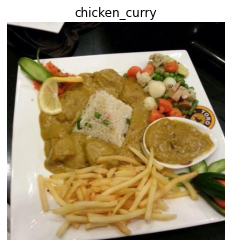

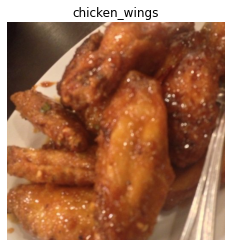

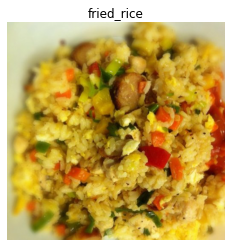

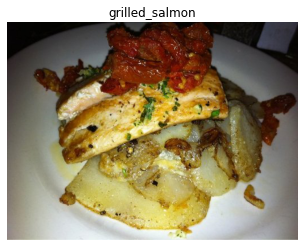

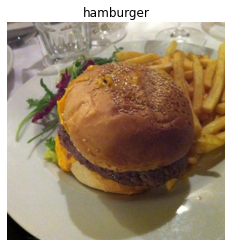

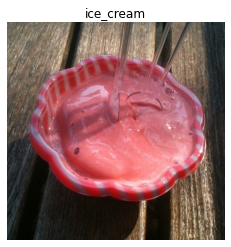

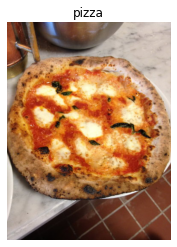

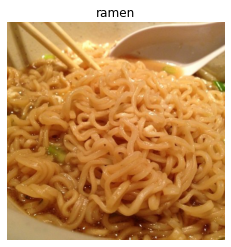

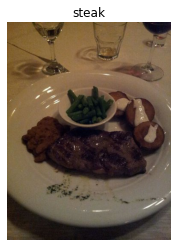

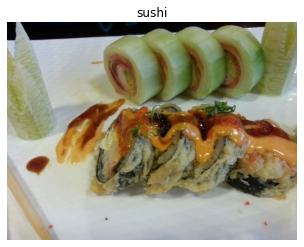

In [9]:
for name in class_names:
    view_random_image(data_dir, name)

## 2. Preprocess the data

In [10]:
import tensorflow as tf

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1/255.
                                   # rotation_range=.2,
                                   # shear_range=.2,
                                   # oom_range=.2,
                                   # height_shift_range=.3,
                                   # orizontal_flip=True
                                  )

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a baseline model

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_5 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          input_shape=(224, 224, 3)),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')])

In [15]:
# Compile the model

model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [16]:
# Fit the model

# history_5 = model_5.fit(train_data, epochs=5,
#                        steps_per_epoch=len(train_data),
#                        validation_data=test_data,
#                        validation_steps=len(test_data))

## 4. Evalueate the model

In [17]:
model_5.evaluate(test_data)

79/79 [==============================] - 115s 1s/step - loss: 2.3034 - accuracy: 0.0940


[2.303375244140625, 0.09399999678134918]

In [13]:
# Plot validation and training curves separately
def plot_the_curves(history):
    '''
    Returns separate loss curves for training and validation data
    '''
    # Obtain loss from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Obtain accuracy from history
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    # Obtain number of epochs
    epochs = range(len(history.history['loss']))
    
    # Setup the figure
    plt.figure(figsize=(24, 6))
    plt.suptitle(f'Model {history.model.name} metrics', fontsize='x-large')
    
    # Plot loss
    plt.subplot(1, 2, 1)
    ax1 = plt.plot(epochs, loss, label='Training Loss')
    ax1 = plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss Curves')
                  
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Curves')

In [19]:
# Check the model's curves
# plot_the_curves(history_5)

NameError: name 'history_5' is not defined

## 5. Adjust the model to reduce overfitting

Steps to reduce overfitting
1. Add more data
2. Use data augmentation
3. Use architectures that generalize well
4. Add regularization (mostly dropout, L1/L2 regularization are also possible)
5. Reduce architecture complexity.
6. Use transfer learning

In [14]:
from tensorflow.keras.layers import SpatialDropout2D

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_6 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          input_shape=(224, 224, 3)),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.25),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')])

In [22]:
# Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [23]:
# Fit the model
# history_6 = model_6.fit(train_data, epochs=5,
#                        steps_per_epoch=len(train_data),
#                        validation_data=test_data,
#                        validation_steps=len(test_data))

In [24]:
# model_6.evaluate(test_data)

In [25]:
# plot_the_curves(history_6)

### Add regularization

In [26]:
# Set random seed
tf.random.set_seed(42)

# Create the model

model_6_1 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          input_shape=(224, 224, 3)),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.5),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    Conv2D(10, 3),
    Activation('relu'),
    SpatialDropout2D(0.5),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')])

In [27]:
# Compile the model
model_6_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [28]:
# Fit the model
history_6_1 = model_6_1.fit(train_data, epochs=10,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 460s 2s/step - loss: 2.3031 - accuracy: 0.1160 - val_loss: 2.2721 - val_accuracy: 0.1568
Epoch 2/10
235/235 [==============================] - 447s 2s/step - loss: 2.2709 - accuracy: 0.1387 - val_loss: 2.2511 - val_accuracy: 0.1764
Epoch 3/10
235/235 [==============================] - 400s 2s/step - loss: 2.2382 - accuracy: 0.1652 - val_loss: 2.2385 - val_accuracy: 0.1760
Epoch 4/10
235/235 [==============================] - 420s 2s/step - loss: 2.2011 - accuracy: 0.1827 - val_loss: 2.1639 - val_accuracy: 0.1792
Epoch 5/10
235/235 [==============================] - 387s 2s/step - loss: 2.1717 - accuracy: 0.2032 - val_loss: 2.1378 - val_accuracy: 0.2160
Epoch 6/10
235/235 [==============================] - 407s 2s/step - loss: 2.1166 - accuracy: 0.2363 - val_loss: 2.1017 - val_accuracy: 0.2184
Epoch 7/10
235/235 [==============================] - 311s 1s/step - loss: 2.0294 - accuracy: 0.2877 - val_loss: 2.0932 - val_accuracy: 0.2296

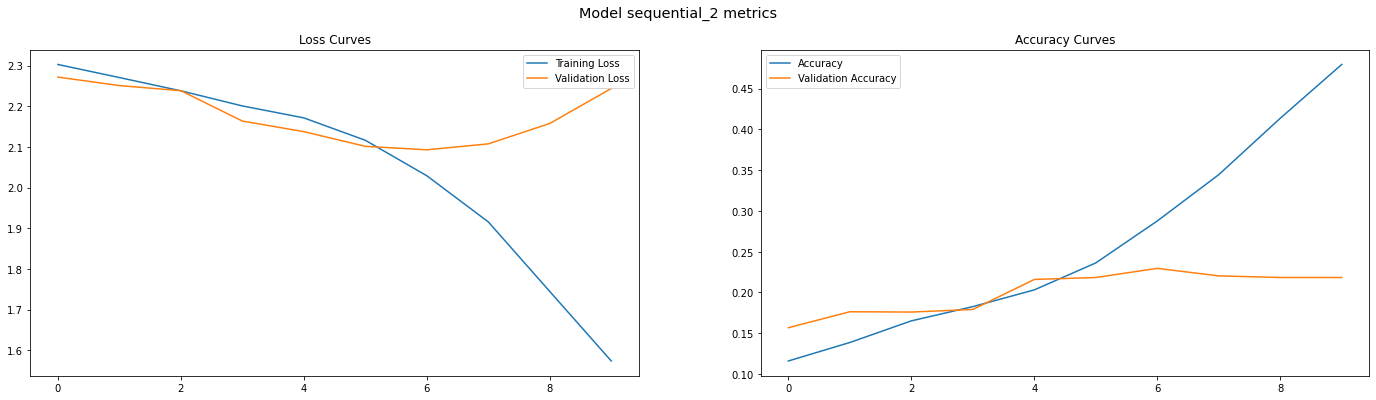

In [30]:
plot_the_curves(history_6_1)

### Simplify the baseline model

In [33]:
# Set random seed 
tf.random.set_seed(42)

# Ceate a model 
model_7 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [34]:
model_7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_14 (Activation)   (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
activation_15 (Activation)   (None, 109, 109, 10)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 29160)            

In [35]:
# Fit the reduced model
history_7 = model_7.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 104s 441ms/step - loss: 2.0907 - accuracy: 0.2577 - val_loss: 1.9929 - val_accuracy: 0.2832
Epoch 2/5
235/235 [==============================] - 206s 876ms/step - loss: 1.7696 - accuracy: 0.3960 - val_loss: 1.8659 - val_accuracy: 0.3292
Epoch 3/5
235/235 [==============================] - 200s 852ms/step - loss: 1.4752 - accuracy: 0.5101 - val_loss: 1.8772 - val_accuracy: 0.3652
Epoch 4/5
235/235 [==============================] - 212s 902ms/step - loss: 1.0639 - accuracy: 0.6608 - val_loss: 2.0329 - val_accuracy: 0.3352
Epoch 5/5
235/235 [==============================] - 212s 903ms/step - loss: 0.6404 - accuracy: 0.8140 - val_loss: 2.3635 - val_accuracy: 0.3112


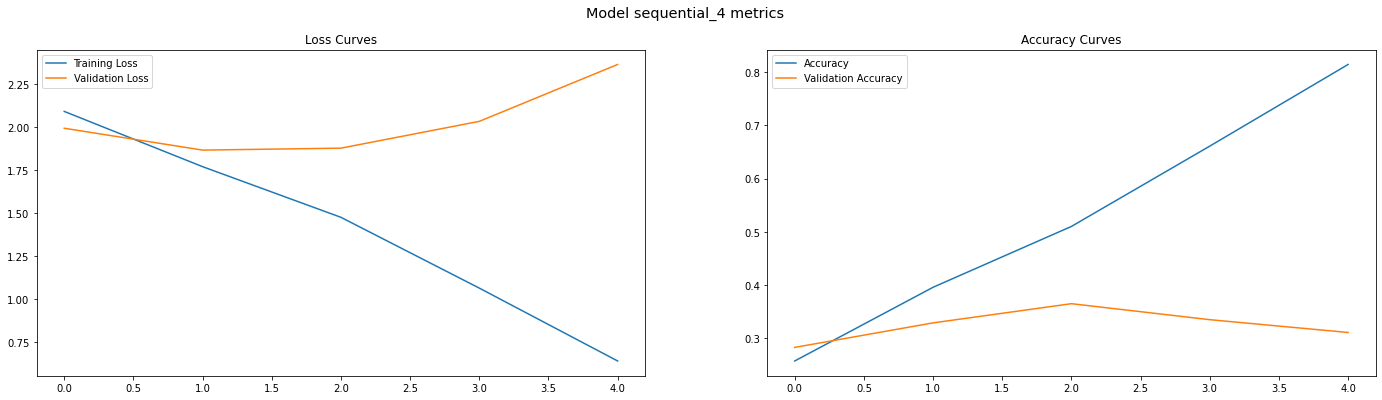

In [36]:
plot_the_curves(history_7)

In [42]:
model_7.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
activation_14 (Activation)   (None, 222, 222, 10)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
activation_15 (Activation)   (None, 109, 109, 10)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 29160)            

### Data augmentation

In [15]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   height_shift_range=.3,
                                   horizontal_flip=True
                                  )

test_datagen = ImageDataGenerator(rescale=1/255.)

# Create batch flow from directories
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode='categorical',
                                            batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [43]:
model_7_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_7_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [44]:
history_7_1 = model_7_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 240s 1s/step - loss: 2.2036 - accuracy: 0.1983 - val_loss: 2.0576 - val_accuracy: 0.2704
Epoch 2/5
235/235 [==============================] - 271s 1s/step - loss: 2.0721 - accuracy: 0.2621 - val_loss: 1.9517 - val_accuracy: 0.3056
Epoch 3/5
235/235 [==============================] - 247s 1s/step - loss: 2.0212 - accuracy: 0.2893 - val_loss: 1.9598 - val_accuracy: 0.3168
Epoch 4/5
235/235 [==============================] - 256s 1s/step - loss: 2.0036 - accuracy: 0.3041 - val_loss: 1.8549 - val_accuracy: 0.3708
Epoch 5/5
235/235 [==============================] - 243s 1s/step - loss: 1.9780 - accuracy: 0.3085 - val_loss: 1.7987 - val_accuracy: 0.3812


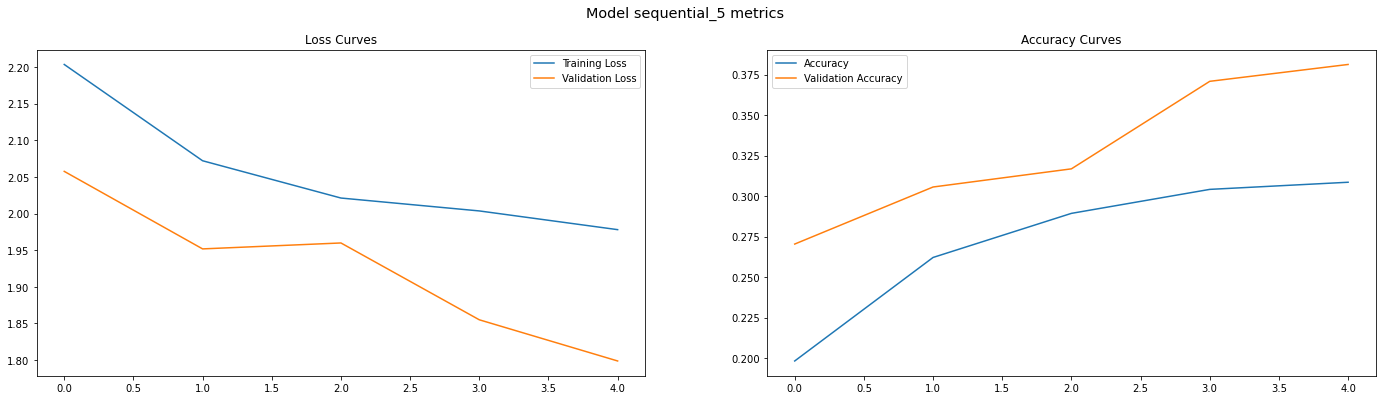

In [45]:
plot_the_curves(history_7_1)

### Add regularization

In [16]:
model_7_2 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation('relu'),
    SpatialDropout2D(0.35),
    MaxPool2D(),
    Conv2D(10, 3),
    Activation('relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model
model_7_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

In [17]:
history_7_2 = model_7_2.fit(train_data,
                       epochs=15,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 260s 1s/step - loss: 2.3145 - accuracy: 0.1225 - val_loss: 2.2135 - val_accuracy: 0.1908
Epoch 2/15
235/235 [==============================] - 264s 1s/step - loss: 2.2191 - accuracy: 0.1739 - val_loss: 2.1123 - val_accuracy: 0.2632
Epoch 3/15
235/235 [==============================] - 260s 1s/step - loss: 2.1609 - accuracy: 0.2109 - val_loss: 2.0577 - val_accuracy: 0.2708
Epoch 4/15
235/235 [==============================] - 250s 1s/step - loss: 2.1306 - accuracy: 0.2349 - val_loss: 1.9916 - val_accuracy: 0.2768
Epoch 5/15
235/235 [==============================] - 255s 1s/step - loss: 2.0952 - accuracy: 0.2545 - val_loss: 1.9720 - val_accuracy: 0.2912
Epoch 6/15
235/235 [==============================] - 250s 1s/step - loss: 2.0619 - accuracy: 0.2707 - val_loss: 1.8972 - val_accuracy: 0.3508
Epoch 7/15
235/235 [==============================] - 264s 1s/step - loss: 2.0449 - accuracy: 0.2752 - val_loss: 1.8881 - val_accuracy: 0.3628

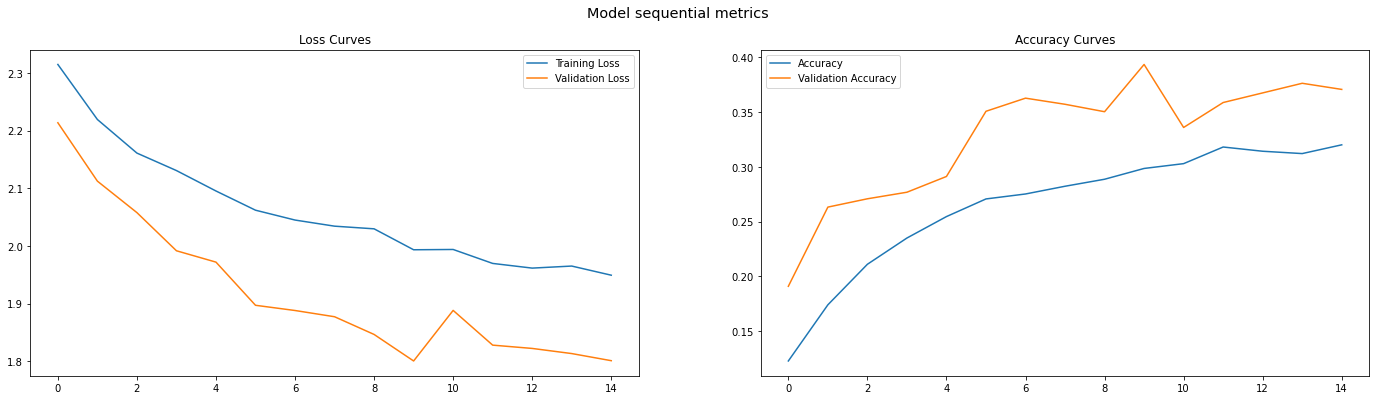

In [18]:
plot_the_curves(history_7_2)